# Crawling 크롤링
* 하는 이유? 웹상의 데이터 수집하기 위해서 
* 웹페이지 접속 > 해당 웹페이지 어디에 위치 > 값을 가져옴 > 어떤 데이터 형식인지 > 데이터 변환 > 데이터 저장 
* Python: Numpy, Pandas + Requests, BeautifulSoup ...

In [ ]:
#나 (클라이언트) =>    url주소로 요청 (Request) => 네이버(서버)에  
#               <= 메인페이지로 응답 (Response) <=   

## Requests - 요청 라이브러리
* HTTP 요청을 보내는데 사용하는 라이브러리 
* 클라이언트의 요청 

In [1]:
import requests

print(requests.__version__)

2.27.1


In [2]:
html = requests.get('http://www.paullab.co.kr/stock.html')  #get요청
html      #성공 

<Response [200]>

In [ ]:
#GET 요청 : 요청사항이 주소상에 들어가 있음 
#POST 요청 : 숨겨져있음 - 보안 필요한 경우, 요청내용 긴 경우 

In [3]:
html.text

'<!DOCTYPE html>\n<html lang="en">\n\n<head>\n  <meta charset="UTF-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n  <meta http-equiv="X-UA-Compatible" content="ie=edge">\n  <title>Document</title>\n  <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css">\n  <link rel="stylesheet" type="text/css" href="https://pro.fontawesome.com/releases/v5.10.0/css/all.css" integrity="sha384-AYmEC3Yw5cVb3ZcuHtOA93w35dYTsvhLPVnYs9eStHfGJvOvKxVfELGroGkvsg+p" crossorigin="anonymous">\n  <style>\n    h1{\n      margin: 2rem;\n    }\n    h1>span{\n      font-size: 1rem;\n    }\n    .main {\n      width: 80%;\n      margin: 0 auto;\n      text-align: center;\n    }\n\n    table {\n      width: 100%;\n    }\n\n    a {\n      color: inherit;\n      cursor: pointer;\n      text-decoration: none;\n    }\n\n    a:hover {\n      color: #000;\n      text-decoration: none;\n    }\n\n    em {\n      font: inherit;\n    }\n\n    #informa

In [ ]:
#하지만 내용 연달아 보기 힘드니까 
# 보기 쉽게 > BeautifulSoup 이용 

## BeautifulSoup - 보기쉽게
* 위치 편리하게 찾고 싶을때 

In [ ]:
from bs4 import BeautifulSoup

html = requests.get('http://www.paullab.co.kr/stock.html')  
text = html.text

soup = BeautifulSoup(text, 'html.parser')    #보기 좋게 정리해주는 
#print(soup)

In [5]:
soup.title            #title 태그만 나옴 

<title>Document</title>

In [82]:
soup.title.string     #값만 가져오고 싶을때 
#soup.title.text

'Document'

### .find('') - 첫번째 태그

In [6]:
soup.table           #table 첫번째 태그 가져옴 #열기 닫기 기준 

#<table></table>
#<tr></tr>
#<th></th>
#<td></td>

soup.find('table')   ###soup.table과 같은기능!

<table class="border-style" summary="시가총액 정보">
<tr>
<th class="strong" scope="row">시가총액</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td class="strong"><em id="_market_sum">349조 2,323</em>억원</td>
</tr>
<tr>
<th scope="row">
<a class="link_site" href="#">시가총액순위<i class="fas fa-caret-right"></i></a>
</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td>위니브월드 <em id="_market_sum">1</em>위</td>
</tr>
<tr>
<th scope="row">상장주식수</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td><em id="_market_sum">5,969,782,550</em></td>
</tr>
</table>

### .find_all (리스트로 반환) - 여러 태그 

In [ ]:
#여러개 태그 불러오고 싶다면
soup.find_all('table')

In [ ]:
soup.find_all('table', class_='table')    #여러값이니까 결과값은 리스트로 반환! #따라서 인덱싱 가능 

In [ ]:
tag = soup.find(id=('update'))
dir(tag)      # dir -> 어떤 객체 .을 찍고 사용할 수 있는 매서드의 목록을 보여줌

In [12]:
tag.name

'span'

In [13]:
tag['id']

'update'

### .select (리스트) - 원하는 값 접근
* selector 이용 
* id와 class 등 찾아줌 

In [ ]:
## 페이지 안 원하는 값 빨리 찾아가는 방법 - selector (선택자)

#id = 'stock' - 페이지 당 하나
#class = '2022' - 페이지당 여러개 

In [15]:
#id : #id명
#class: .class명 

# <-> soup.find(id='update')
soup.select('#update')         #id #여러값이기에 결과 리스트 

[<span id="update">update : 20.12.30 / 해외 크롤링이 Block되어 있으므로 크롤링이 안되시는 분은 이 URL(http://paullab.synology.me/stock.html)을 사용하세요.</span>]

In [ ]:
soup.select('.table')

In [ ]:
## 구조를 타고들어갈때:  > 이용  #table class안 tbody 태그임(.없으니까) 

soup.select('.table > tbody')   

In [19]:
soup.select('.table > tr')     #table > tbody 존재하기 때문에 > 그 안 tr로 바로 접근불가

[]

In [ ]:
soup.select('.table > tbody > tr')   #순서에 맞게하면 가능 

In [ ]:
## 경로로 접근하기 

one = soup.select('.main')[2]    #클래스로 접근 #하위태그로 바로 접근 불가 
one # div > h2, h3, table

In [ ]:
two = soup.select('tbody > tr')  #태그로 접근 #따라서 하위태그로 바로 접근가능 
two

In [ ]:
# 크롬 브라우저 -> 오른쪽 클릭 -> 검사 -> (왼쪽 상단) 마우스 클릭 모양 선택 -> 내가 원하는 곳을 찾는다.
    # -> 오른쪽 클릭 -> copy -> copy selector -> 자동으로 경로 복사
    # body > div:nth-child(5) > table

- Requests -> BeautifulSoup -> 변환, 접근

## FinanceDataReader
* 금융정보 (특히, 주식 가격, 환율, 암호화폐 가격..)
* 시계열데이터 수집 

In [ ]:
!pip install finance-datareader

In [25]:
import FinanceDataReader as fdr

fdr.__version__

'0.9.50'

### krx 한국거래소의 주식리스트 

In [26]:
import FinanceDataReader as fdr

# fdr 이용해 데이터 불러오면 -> 데이터프레임 형태! 
df_krx = fdr.StockListing('krx')

In [28]:
df_krx.head()
df_krx.shape   #(index, column) :2717 주식종목, 17가지 정보임 

(2717, 17)

In [30]:
df_krx.describe()
df_krx.info()  #null값 없음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         2717 non-null   object 
 1   ISU_CD       2717 non-null   object 
 2   Name         2717 non-null   object 
 3   Market       2717 non-null   object 
 4   Dept         2717 non-null   object 
 5   Close        2717 non-null   object 
 6   ChangeCode   2717 non-null   object 
 7   Changes      2717 non-null   int64  
 8   ChagesRatio  2717 non-null   float64
 9   Open         2717 non-null   int64  
 10  High         2717 non-null   int64  
 11  Low          2717 non-null   int64  
 12  Volume       2717 non-null   int64  
 13  Amount       2717 non-null   int64  
 14  Marcap       2717 non-null   int64  
 15  Stocks       2717 non-null   int64  
 16  MarketId     2717 non-null   object 
dtypes: float64(1), int64(8), object(8)
memory usage: 361.0+ KB


### 단일종목의 주식가격 -코드번호 이용

In [31]:
#위에서 코드번호 파악해서 
samsung_df = fdr.DataReader('005930')
samsung_df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-02-10,1653,1675,1604,1634,664282,NaN
1999-02-11,1661,1678,1643,1644,287590,0.006120
1999-02-12,1682,1751,1667,1743,403600,0.060219
1999-02-18,1712,1721,1682,1687,440930,-0.032129
1999-02-19,1663,1663,1602,1653,503847,-0.020154
...,...,...,...,...,...,...
2023-05-22,68400,69000,68000,68500,14470308,0.001462
2023-05-23,68500,68700,68100,68400,8561643,-0.001460
2023-05-24,68100,68700,68000,68500,8192896,0.001462


In [ ]:
#여기서 특정연도 불러오고 싶다면
samsung_df_2022 = fdr.DataReader('005930', '2022')    #2022~현재까지 
samsung_df_2022

In [85]:
samsung_df_2022_ = fdr.DataReader('005930', '2022','2023')    #2022~22년 12월까지 
samsung_df_2022_                                              #2022-01-03 으로 날짜까지 지정할수도 

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920
2022-12-26,58000,58100,57700,57900,6756411,-0.003442
2022-12-27,58000,58400,57900,58100,10667027,0.003454


#### 상장폐지종목 데이터 

In [36]:
del_stock = fdr.DataReader('003497', exchange='krx-delisting') # 003497 상장 폐지 -> krx에는 데이터가 없음, exchange='krx-delisting'
del_stock

,Date,Code,Name,Market,SecuGroup,Close,UpDown,Change,ChangeRate,Open,High,Lower,Volume,Amount,MarCap
0,2001-04-13,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
1,2001-04-12,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
2,2001-04-11,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
3,2001-04-10,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
4,2001-04-09,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,1998-04-30,003497,대한항공(2우B),KOSPI,주권,1915,1,5,0.26,1915,1915,1915,110,210650,660282425
754,1998-04-29,003497,대한항공(2우B),KOSPI,주권,1910,2,-95,-4.74,1910,1910,1910,430,821300,658558450
755,1998-04-28,003497,대한항공(2우B),KOSPI,주권,2005,1,5,0.25,2005,2005,2005,100,200500,691313975
756,1998-04-27,003497,대한항공(2우B),KOSPI,주권,2000,1,90,4.71,1910,2000,1910,260,501100,689590000


### 단일종목 그래프

In [ ]:
samsung_df_2022_

<Axes: xlabel='Date'>

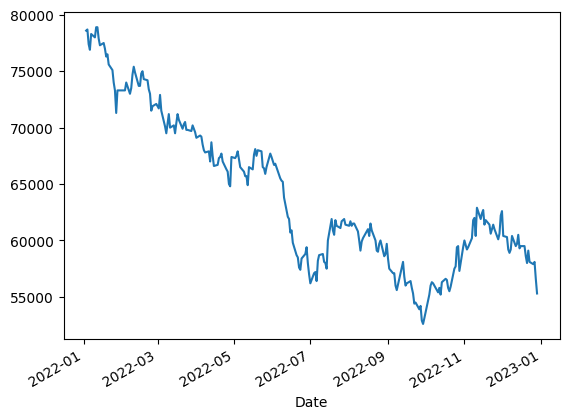

In [39]:
#종가차트를 그려본다면 > 데이터프레임이니까 Close컬럼 가져와야 

samsung_df_2022_['Close'].plot()   #x축이 index > 날짜/ y축이 종가        ##

<Axes: xlabel='Date'>

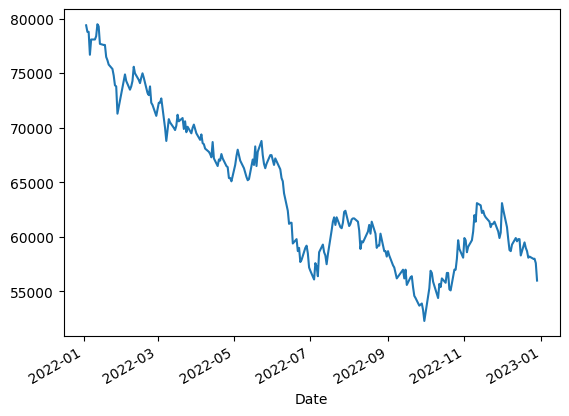

In [40]:
#시가 차트 그려보기

samsung_df_2022_['Open'].plot()

###__

### 환율데이터

In [41]:
ex_us_kw_df = fdr.DataReader('USD/KRW', '2023')   #usd 1달러당 krw원 얼마인지 비교 
ex_us_kw_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,1260.910034,1273.930054,1256.550049,1260.910034,1260.910034,0
2023-01-03,1270.099976,1278.969971,1264.390015,1270.099976,1270.099976,0
2023-01-04,1279.079956,1279.719971,1267.560059,1279.079956,1279.079956,0
2023-01-05,1271.079956,1278.229980,1265.739990,1271.079956,1271.079956,0
2023-01-06,1274.180054,1274.180054,1253.010010,1274.180054,1274.180054,0
...,...,...,...,...,...,...
2023-05-22,1324.209961,1324.219971,1312.430054,1324.209961,1324.209961,0
2023-05-23,1313.829956,1321.729980,1308.260010,1313.829956,1313.829956,0
2023-05-24,1319.839966,1320.300049,1314.089966,1319.839966,1319.839966,0


<Axes: xlabel='Date'>

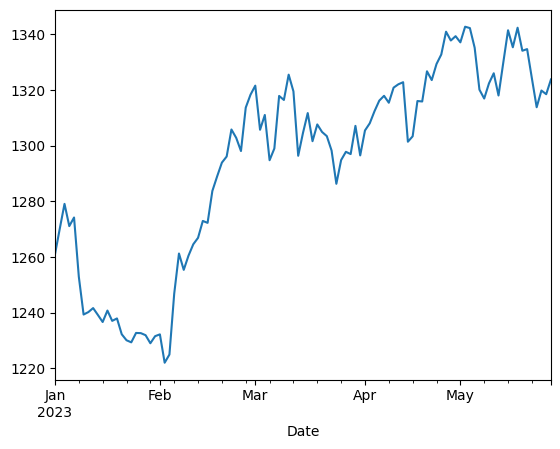

In [42]:
ex_us_kw_df['Close'].plot()

### 암호화폐 데이터

In [43]:
btc_krw_df = fdr.DataReader('BTC/KRW', '2023')
btc_krw_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,20881980.0,20983694.0,20848310.0,20976934.0,20976934.0,11664205615481
2023-01-02,20977476.0,21355044.0,20930146.0,21196110.0,21196110.0,15365444804389
2023-01-03,21196588.0,21310532.0,21286596.0,21340292.0,21340292.0,17787669052216
2023-01-04,21340738.0,21612098.0,21267144.0,21440006.0,21440006.0,23421496568532
2023-01-05,21440302.0,21411704.0,21411510.0,21458506.0,21458506.0,17451489256812
...,...,...,...,...,...,...
2023-05-22,35937472.0,36132932.0,35393188.0,35454384.0,35454384.0,11459626783399
2023-05-23,35449176.0,35568568.0,35105516.0,35287412.0,35287412.0,14530586645292
2023-05-24,35293568.0,35985904.0,35170116.0,35943132.0,35943132.0,18082910616976


<Axes: xlabel='Date'>

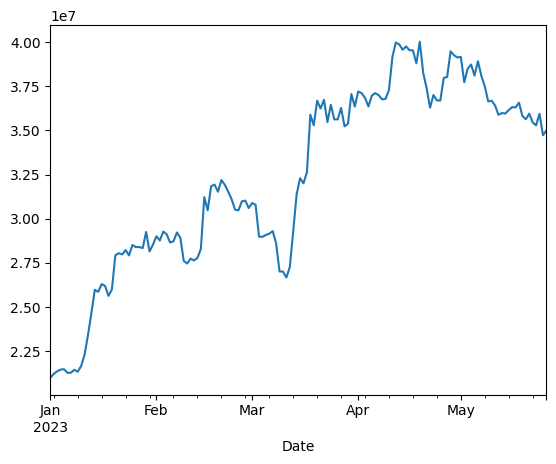

In [44]:
btc_krw_df['Close'].plot()

In [ ]:
## 지금까지는 웹상의 데이터를 크롤링한것 

##__

## 파일형태 데이터들
* 한글, 엑셀, PDF

### 파일데이터
* 한글(.hwp) 파일 크롤링 - ole 라이브러리 이용 

In [45]:
!pip install ole-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## 참고용 코드 
import os
import pandas as pd
import ole

#경로설정 
dir_path = 'data_hwp/'

#파일이름 설정
hwp_name = '예제.hwp'

#다시 경로 + 파일이름 설정 
hwp_path = os.path.join(dir_path, hwp_name)  #두가지 경로 합침 

#불러오기 
f = ole.open(hwp_path)

content = f.get_stream('PrvText').read().decode('utf-16le')
#print(content)

In [ ]:
#excel 파일로 변환 - 참고용 
columns = ['Name', 'Company', 'Phone', 'e-mail', 'why', 'experience']
df = pd.DataFrame(columns=columns)

# 읽어온 값을 hwp 분리해서 딕셔너리
word_list = content.split('><')
target_list = ['성    명', '소    속', '연 락 처', 'E-mail', '지원동기', '연 령 대']  #위랑 mapping
info_dict = {} # 데이터 추출후 저장할 빈 딕셔너리

#excel > 다시 dataframe으로
# 데이터 프레임으로 만들기
for n, target in enumerate(target_list):
  info = word_list[word_list.index(target) + 1]
  info_dict[column[n]] = info

df = pd.DataFrame(data=info_dict, index=[0], columns=columns)
df

# 엑셀 파일로 추출
df.to_exel('예제.xlsx')

### PDF 데이터

In [ ]:
#코드 참고용 : pdf > text로 불러오기 

#모듈 임포트
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def pdf2txt(pdf_file):
    rsrcmgr = PDFResourceManager()
   
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(pdf_file, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()
    
    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,
                                 caching=caching, check_extractable=True):
        interpreter.process_page(page)
    
    text = retstr.getvalue()
    
    fp.close()
    device.close()
    retstr.close()
    return text

# pdf 파일 불러오기
import os
os.chdir('C:\workspace')
os.listdir('sample/')
pdf_path='sample/예제.pdf'

text = pdf2txt(pdf_path)
text  #text파일로 변환해줌 

# 연습문제
* Requests, BeautifulSoup 이용해서 데이터 가져와야하는데
* 'http://www.paullab.co.kr/stock.html' 데이터 중 main 클래스의 2번째(1 인덱스)값을 가져와주세요.

In [ ]:
##내답 
import requests 

html = requests.get('http://www.paullab.co.kr/stock.html')
html.text

In [ ]:
#보기쉽게 > BeautifulSoup
from bs4 import BeautifulSoup

text = html.text
soup = BeautifulSoup(text, 'html.parser')
soup

In [ ]:
soup.select('.main')[1]

In [ ]:
## 1. 제주코딩베이스캠프 연구원의 일별 시세테이블을 가져와주세요 

In [ ]:
soup.select('body > div:nth-child(3) > table')   #selector를 복사한다.

# #인덱싱으로 접근 
# one = soup.select('.main')[2]
# two = one.select('table')

In [ ]:
#내 답 - 틀림 
#soup.select('.table > tbody ')   #아 ~~ 연구원만임 

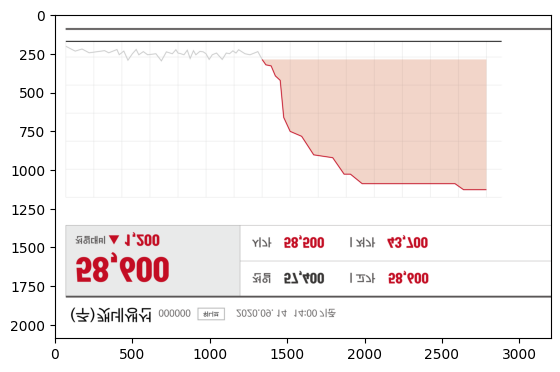

In [94]:
## 2. (주) 캣네생선의 왼쪽 이미지를 불러온뒤, 위아래 반전시켜주세요 
#https://paullab.co.kr/cats_stock.png

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#컴퓨터가 인식할 수 있는 상태로 
stock = Image.open('cats_stock.png')
#stock

#배열로 변환 
pixel = np.array(stock)
#plt.imshow(pixel)

#상하반전
plt.imshow(pixel[::-1])

#좌우반전
plt.imshow(pixel[:, ::-1]) 

<Axes: xlabel='Date'>

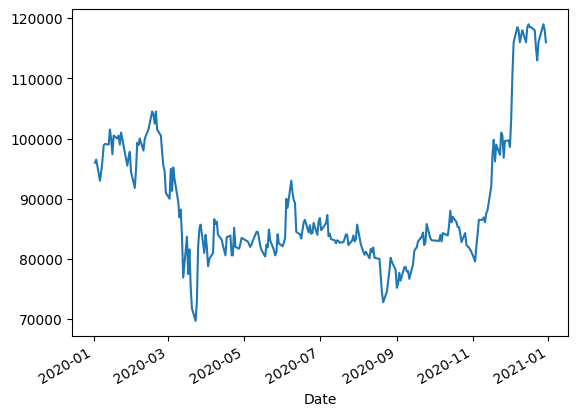

In [81]:
## 3. sk하이닉스의 2020년도 데이터를 출력하고, 그 시가 데이터를 그래프로 나타내주세요. 
import FinanceDataReader as fdr

df_krx = fdr.StockListing('krx')
#df_krx  -코드번호 확인 

#단일종목 - 코드번호 이용 
skhynix_df_2020 = fdr.DataReader('000660', '2020', '2021')
skhynix_df_2020['Open'].plot()